In [15]:
import h3

import geopandas
#import geodatasets
import contextily as cx
import matplotlib.pyplot as plt


def plot_df(df, column=None, ax=None):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=3857)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=0.5, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)


def plot_shape(shape, ax=None):
    df = geopandas.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax)


def plot_cells(cells, ax=None):
    shape = h3.cells_to_h3shape(cells)
    plot_shape(shape, ax=ax)


def plot_shape_and_cells(shape, res=9):
    fig, axs = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
    plot_shape(shape, ax=axs[0])
    plot_cells(h3.h3shape_to_cells(shape, res), ax=axs[1])
    fig.tight_layout()

  name         gb                                           geometry
0  云南省  156530000  POLYGON ((99.11815 29.19243, 99.10934 29.16576...


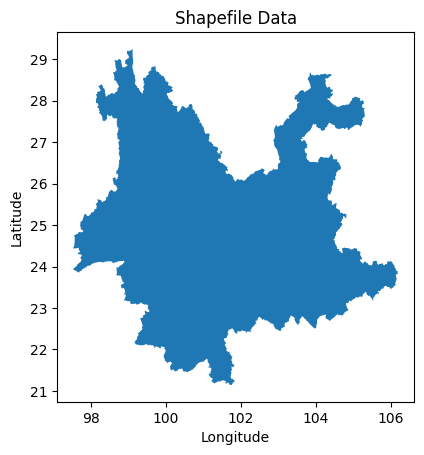

In [9]:

#shp必须与shx同处于一个文件夹内
#数据来源：https://github.com/GaryBikini/ChinaAdminDivisonSHP
shapefile_path = './shape/YN.shp'
gdf = geopandas.read_file(shapefile_path)

print(gdf.head())

gdf.plot()
plt.title('Shapefile Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [3]:
gdf

,name,gb,geometry
0,云南省,156530000,"POLYGON ((99.11815 29.19243, 99.10934 29.16576..."


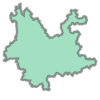

In [5]:
gdf.geometry[0]

In [6]:
df = gdf.to_crs(epsg=4326)
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
geo = df.geometry[0]
type(geo)

shapely.geometry.polygon.Polygon

In [10]:
h3.geo_to_cells(geo, res=6)

['8640582afffffff',
 '86406038fffffff',
 '86406846fffffff',
 '8640750e7ffffff',
 '864043557ffffff',
 '86407054fffffff',
 '8640638d7ffffff',
 '86404000fffffff',
 '864046a9fffffff',
 '864073a97ffffff',
 '864056c5fffffff',
 '864062287ffffff',
 '86406a367ffffff',
 '86404544fffffff',
 '864072447ffffff',
 '8640408b7ffffff',
 '86407598fffffff',
 '864058b57ffffff',
 '86405c09fffffff',
 '8640427afffffff',
 '864062b2fffffff',
 '86406ac0fffffff',
 '864045cf7ffffff',
 '86404cc87ffffff',
 '864066077ffffff',
 '86404115fffffff',
 '86406e157ffffff',
 '864071b9fffffff',
 '864044ba7ffffff',
 '8640614dfffffff',
 '8640446a7ffffff',
 '86407169fffffff',
 '86415a757ffffff',
 '86404c787ffffff',
 '864054867ffffff',
 '86405c947ffffff',
 '864043057ffffff',
 '86407004fffffff',
 '86406b4b7ffffff',
 '864073597ffffff',
 '86404659fffffff',
 '86405675fffffff',
 '864041a07ffffff',
 '864059ca7ffffff',
 '864061d87ffffff',
 '8640652cfffffff',
 '8640403b7ffffff',
 '86407548fffffff',
 '864058657ffffff',
 '864060737ffffff',


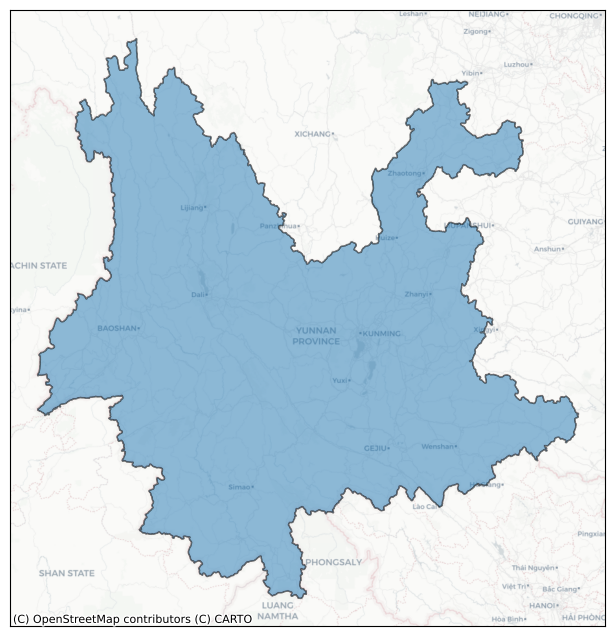

In [18]:
plot_cells(h3.geo_to_cells(geo, res=9))